In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#% matplotlib inline

In [46]:
image_path = 'features_2.xlsx'  #give path where extracted features are saved

In [47]:
image_xlx = pd.read_excel(image_path, header=None)

In [48]:
image_xlx.head()

,0,1,2,3,4,5,6
0,NaN,contrast,dissimilarity,homogeneity,ASM,energy,Label
1,0.0,12769357,562393,2747.88,312782,559.269,0
2,1.0,9580203,482361,3308,289038,537.623,0
3,2.0,10928946,517098,3084.55,337650,581.077,0
4,3.0,12465011,556457,2776.65,372854,610.618,0


In [49]:
X = np.array((image_xlx.as_matrix())[1:,1:])
Y = X[:,5]
X = X[:,0:5]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


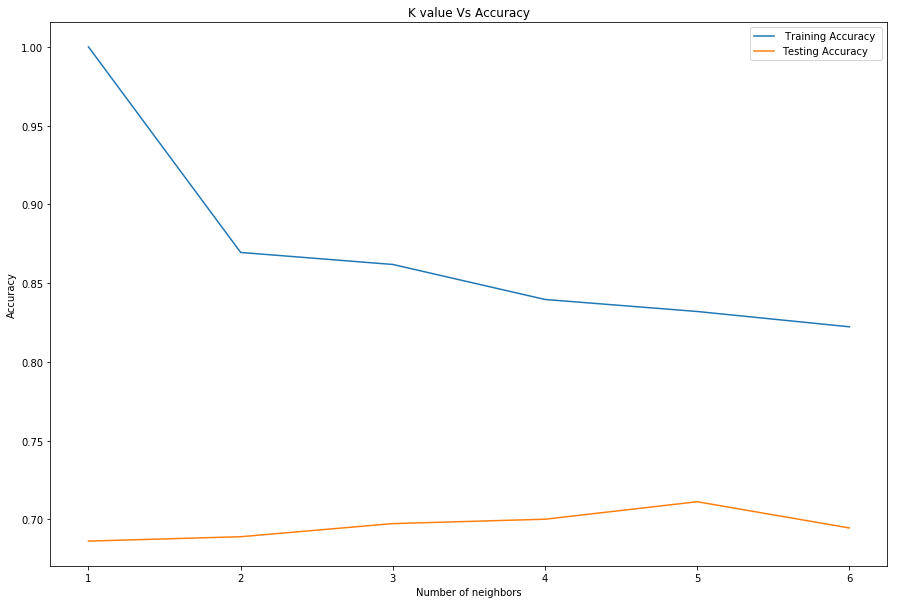

Best accuracy is 0.7111111111111111 with K = 5


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,stratify= Y, test_size=0.2, random_state= 2, shuffle= True)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
train_accuracy = []
test_accuracy = []

k_range = list(range(1, 7))

knn = Pipeline(memory=None,
               steps=[("knncls", KNeighborsClassifier(n_neighbors=k))])

for k in k_range:
    knn.set_params(knncls__n_neighbors=k)
    #knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.figure(figsize= [15,10])
plt.plot(k_range, train_accuracy, label= " Training Accuracy ")
plt.plot(k_range, test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("K value Vs Accuracy")
plt.xticks(k_range)
plt.show()

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


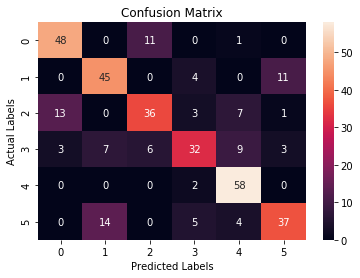

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        60
           1       0.68      0.75      0.71        60
           2       0.68      0.60      0.64        60
           3       0.70      0.53      0.60        60
           4       0.73      0.97      0.83        60
           5       0.71      0.62      0.66        60

   micro avg       0.71      0.71      0.71       360
   macro avg       0.71      0.71      0.70       360
weighted avg       0.71      0.71      0.70       360



In [105]:
knn = KNeighborsClassifier(n_neighbors=5)
y_pred= knn.fit(X_train, y_train).predict(X_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

### Random Forest Classifier

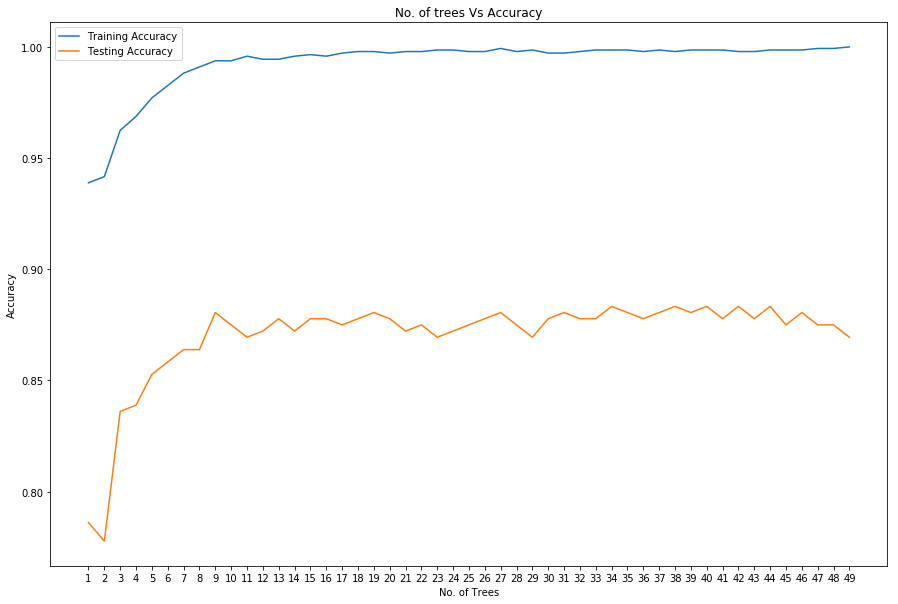

Best Accuracy is 0.8833333333333333 with No. of Trees 34


In [117]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify= Y, test_size= 0.2, random_state= 2, shuffle= True)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
train_accuracy= []
test_accuracy= []

rf_range = list(range(1,50))

rf = Pipeline(memory=None,
             steps=[("rfclf", RandomForestClassifier(random_state=2,  min_samples_split=2, n_estimators=k))])

for k in rf_range:
    rf.set_params(rfclf__n_estimators=k)
    #rf= RandomForestClassifier(random_state =2, n_estimators= t, min_samples_split= 2)
    rf.fit(X_train, y_train)
    train_accuracy.append(rf.score(X_train, y_train))
    test_accuracy.append(rf.score(X_test, y_test))
    
plt.figure(figsize= [15,10])
plt.plot(rf_range, train_accuracy, label= "Training Accuracy")
plt.plot(rf_range, test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.title("No. of trees Vs Accuracy")
plt.xlabel("No. of Trees")
plt.ylabel("Accuracy")
plt.xticks(rf_range)
plt.show()


print("Best Accuracy is {} with No. of Trees {}".format(np.max(test_accuracy), 1+ test_accuracy.index(np.max(test_accuracy))))

### Confusion Matrix for best performance model of Random Forest

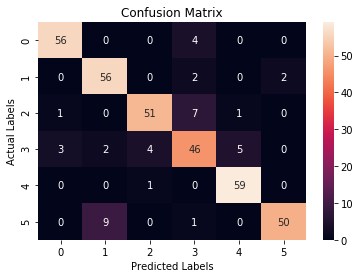

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        60
           1       0.84      0.93      0.88        60
           2       0.91      0.85      0.88        60
           3       0.77      0.77      0.77        60
           4       0.91      0.98      0.94        60
           5       0.96      0.83      0.89        60

   micro avg       0.88      0.88      0.88       360
   macro avg       0.89      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360



In [118]:
rf= RandomForestClassifier(random_state= 2, n_estimators= 34, min_samples_split=2)
y_pred= rf.fit(X_train, y_train).predict(X_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

### Decision Tree with Boosting

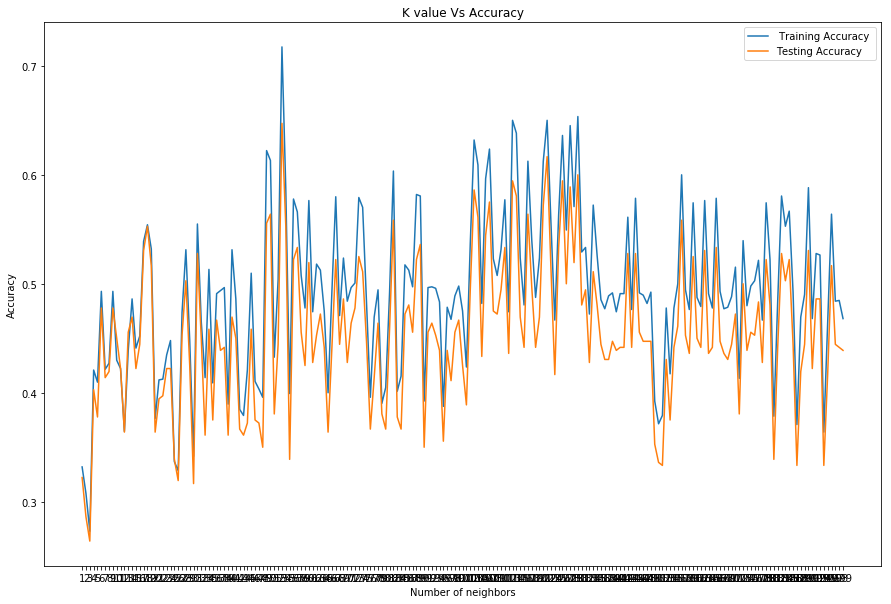

Best accuracy is 0.6472222222222223 with K = 53


In [119]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

y_train = y_train.astype('int')
y_test = y_test.astype('int')
train_accuracy=[]
test_accuracy= []

adb_range = list(range(1,200))

bdt = Pipeline(memory=None,
              steps=[("bdtclf", AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=k))])

for k in adb_range:
    #n_estimators is the number of models to iteratively train
    bdt.set_params(bdtclf__n_estimators=k)
    '''bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=k)'''
    bdt.fit(X_train, y_train)
    test_accuracy.append(bdt.score(X_test, y_test))
    train_accuracy.append(bdt.score(X_train, y_train))


plt.figure(figsize= [15,10])
plt.plot(adb_range, train_accuracy, label= " Training Accuracy ")
plt.plot(adb_range, test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("K value Vs Accuracy")
plt.xticks(adb_range)
plt.show()

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

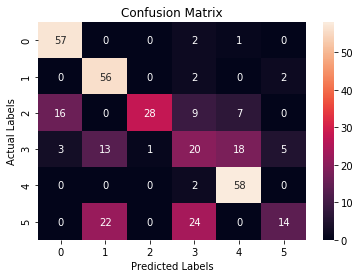

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        60
           1       0.62      0.93      0.74        60
           2       0.97      0.47      0.63        60
           3       0.34      0.33      0.34        60
           4       0.69      0.97      0.81        60
           5       0.67      0.23      0.35        60

   micro avg       0.65      0.65      0.65       360
   macro avg       0.67      0.65      0.62       360
weighted avg       0.67      0.65      0.62       360



In [16]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=53)
y_pred= bdt.fit(X_train, y_train).predict(X_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

### SVM with GridSearch

In [35]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, Y):
    C_vals= [0.001,.01,.1, 1, 10]
    gamma_vals= [.001, .01, .1, 1]
    param_grid= {'C':C_vals, 'gamma': gamma_vals}
    grid_search= GridSearchCV(svm.SVC(kernel= 'rbf'), param_grid)
    grid_search.fit(X, Y)
    print(grid_search.best_params_)
    #print(np.sqrt(-grid_search.best_score_))
    return grid_search.best_params_

In [36]:
best_params= svc_param_selection(X_train, y_train)

C:\Users\16476\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.001, 'gamma': 0.001}


In [40]:
from sklearn.svm import SVR

C_vals = [0.001] ## YOUR VALUES FOR C ##
gamma_vals = [0.001] ## YOUR VALUES FOR gamma ## 

param_grid = [{'C':C_vals, 'gamma':gamma_vals}]
grid_search_rbf = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3,scoring='neg_mean_squared_error')
grid_search_rbf.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001], 'gamma': [0.001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
print(grid_search_rbf.best_params_)
print(np.sqrt(-grid_search_rbf.best_score_))

{'C': 0.001, 'gamma': 0.001}
1.7662236787375867


#### Through an iterative process, trying different ranges of values for C and gamma, the values C=0.001 , gamma=0.0001, give a score of 1.7662

### Performance on Test Set

In [44]:
from sklearn.metrics import mean_squared_error

final_model = grid_search_rbf.best_estimator_   ## THIS SHOULD BE THE BEST GRID_SEARCH ##

y_test_estimation = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, y_test_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

1.707824315222929


0.16944444444444445


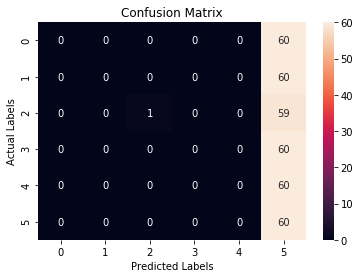

Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00        60
           2       1.00      0.02      0.03        60
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        60
           5       0.17      1.00      0.29        60

   micro avg       0.17      0.17      0.17       360
   macro avg       0.19      0.17      0.05       360
weighted avg       0.19      0.17      0.05       360



C:\Users\16476\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\16476\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\16476\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
clf= svm.SVC(C=0.001, gamma= .001)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

y_pred= clf.fit(X_train, y_train).predict(X_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

## Random Forest has the best accuracy score and hence can be treated as a Best Model for this dataset.